In [13]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

%matplotlib inline

from pylab import rcParams

rcParams['figure.figsize'] = 15, 15

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img




image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.resize(image, (100,100), interpolation=cv2.INTER_AREA)


print(image.shape)

(100, 100, 3)


In [12]:
tmp_img = cv2.imread('/data/roadCrack/sj5000/day/4-9-noon/2019_0409_114022_021/2019_0409_114022_021_000417.jpg')

tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2HSV)

print(tmp_img.shape)

tmp_img_shape = tmp_img.reshape((-1,3))

tmp_pic = gmm.predict(tmp_img_shape)

a = 0
for x in tmp_pic:
    if x:
        a+=1
print(a)


tmp_img = cv2.imread('/home/chiu/data/roadCrack/sj5000/night/4-3-beautiful/JPEGImage/2019_0403_211329_017_004255.jpg')

tmp_img = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2HSV)

tmp_img_shape = tmp_img.reshape((-1,3))

tmp_pic = gmm.predict(tmp_img_shape)

a = 0

for x in tmp_pic:
    if x:
        a+=1
print(a)

(600, 600, 3)
3415
38665


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

%matplotlib inline

from pylab import rcParams

rcParams['figure.figsize'] = 15, 15

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

import glob

fpaths = glob.glob('/data/RoadDamage/data/all/JPEGImages/*.jpg')

#image_list = []

N = len(fpaths)

print(N)
data = np.empty((N, 10000,3), dtype=np.uint8)

for i,fpath in enumerate(fpaths):
    image = cv2.imread(fpath, cv2.COLOR_BGR2HSV)
    
    
    image = cv2.resize(image, (100,100), interpolation=cv2.INTER_AREA)
    
    Z = image.reshape((-1,3))
    
    data[i, ...] = np.uint8(Z)

    #Z = np.float32(Z)
    
    #image_list.append(Z)
# plt.imshow(image)

# print(image.shape)

# image = image.reshape((1,) + image.shape)

# print(image.shape)




# print(Z.shape)

# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# K = 2
# ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)




Using TensorFlow backend.


11653


In [2]:
print(data.shape)
data = data.reshape(-1,3)
print(data.shape)

from sklearn.mixture import GaussianMixture
from sklearn.cluster import MiniBatchKMeans,KMeans
#kmeans = MiniBatchKMeans(2,batch_size=1000)
#kmeans.fit(data)


gmm_pixel = GaussianMixture(n_components=3,covariance_type='diag')
gmm_pixel.fit(data)

#In hsl (gmm kmeans)

(11653, 10000, 3)
(116530000, 3)


GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [3]:
#import csv
import glob
import itertools

def getFilenames(exts):
    fnames = [glob.glob(ext) for ext in exts]
    fnames = list(itertools.chain.from_iterable(fnames))
    return fnames

exts = ["/data/RoadDamage/data/all/JPEGImages/*.jpg"]
res = getFilenames(exts)

tmp_list = []

for tmp_img in res:
    img = cv2.imread(tmp_img,cv2.COLOR_BGR2HSV)
    
    img_shape = img.reshape((-1,3))

    tmp_pixel = gmm_pixel.predict(img_shape)
    
    a = 0
    b = 0
    c = 0
    
    for x in tmp_pixel:
        if x == 0:
            a+=1
        elif x==1:
            b+=1
        elif x==2:
            c+=1

            
    tmp_list.append([a,b,c])


    

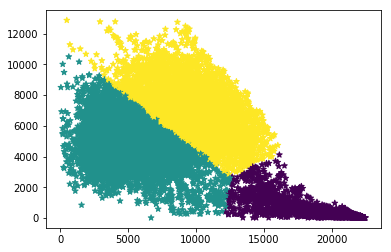

In [4]:
#print(tmp_list)

tmp_list =np.array(tmp_list)
tmp_list = tmp_list[:, ::-1] #交换列是为了方便画图

#print(tmp_list)

gmm_image = GaussianMixture(n_components=3,covariance_type='tied').fit(tmp_list)
#kmeans_image = KMeans(n_clusters=2).fit(tmp_list)

labels = gmm_image.predict(tmp_list)

tmp_list = tmp_list[:, ::-1] #交换列是为了方便画图

plt.scatter(tmp_list[:, 0], tmp_list[:, 1], c=labels, marker='*', cmap='viridis');
plt.savefig('gmm3.jpg')

In [5]:
# fp_day = open("day.txt", "a")

# fp_night = open("night.txt", "a")

list1 = []
list2 = []
list3 = []

# 寫入 This is a testing! 到檔案
#fp.write("This is a testing!")
for tmp_img in res:
    img = cv2.imread(tmp_img,cv2.COLOR_BGR2HSV)
    
    img_shape = img.reshape((-1,3))

    tmp_pixel = gmm_pixel.predict(img_shape)
    
    a = 0
    b = 0
    c = 0
    for x in tmp_pixel:
        if x == 0:
            a+=1
        elif x==1:
            b+=1
        elif x==2:
            c+=1

    labels = gmm_image.predict([[a,b,c]])
    if labels[0]==0:
        #fp_day.write(tmp_img+"\n")
        list1.append(tmp_img)
    elif labels[0]==1:
        #fp_night.write(tmp_img+"\n")
        list2.append(tmp_img)
    elif labels[0]==2:
        list3.append(tmp_img)

    #print(labels[0])
    
# fp_day.close()
# fp_night.close()

In [6]:
import random
import os

train1 = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_2_1_train.txt", "w")
val1 = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_2_1_val.txt", "w")

for file in list1:
    rand = random.random()
    filename = file.split('/')[-1].split('.')[0]
    
    if os.path.isfile('/data/RoadDamage/data/all/Annotations/'+ filename+'.xml') and os.path.isfile('/data/RoadDamage/data/all/JPEGImages/'+ filename+'.jpg'):
        if rand < 0.7:
            train1.write(filename+"\n")
        else:
            val1.write(filename+"\n")
        
train2 = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_2_2_train.txt", "w")
val2 = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_2_2_val.txt", "w")

for file in list2:
    rand = random.random()
    filename = file.split('/')[-1].split('.')[0]
    
    if os.path.isfile('/data/RoadDamage/data/all/Annotations/'+ filename+'.xml') and os.path.isfile('/data/RoadDamage/data/all/JPEGImages/'+ filename+'.jpg'):
        if rand < 0.7:
            train2.write(filename+"\n")
        else:
            val2.write(filename+"\n")
        


train1.close()
val1.close()
train2.close()
val2.close()


In [5]:
# fp_day = open("day.txt", "a")

# fp_night = open("night.txt", "a")

list1 = []
list2 = []
list3 = []

# 寫入 This is a testing! 到檔案
#fp.write("This is a testing!")
for tmp_img in res:
    img = cv2.imread(tmp_img,cv2.COLOR_BGR2HSV)
    
    img_shape = img.reshape((-1,3))

    tmp_pixel = gmm_pixel.predict(img_shape)
    
    a = 0
    
    for x in tmp_pixel:
        if x:
            a+=1
            
    labels = gmm_image.predict([[a,a]])
    
    if labels[0]==0:
        #fp_day.write(tmp_img+"\n")
        list1.append(tmp_img)
    elif labels[0]==1:
        #fp_night.write(tmp_img+"\n")
        list2.append(tmp_img)
    else:
        list3.append(tmp_img)
    #print(labels[0])
    
# fp_day.close()
# fp_night.close()

In [7]:
import random
import os

train1 = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_3_1_train.txt", "w")
val1 = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_3_1_val.txt", "w")

for file in list1:
    rand = random.random()
    filename = file.split('/')[-1].split('.')[0]
    
    if os.path.isfile('/data/RoadDamage/data/all/Annotations/'+ filename+'.xml') and os.path.isfile('/data/RoadDamage/data/all/JPEGImages/'+ filename+'.jpg'):
        if rand < 0.7:
            train1.write(filename+"\n")
        else:
            val1.write(filename+"\n")
        
train2 = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_3_2_train.txt", "w")
val2 = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_3_2_val.txt", "w")

for file in list2:
    rand = random.random()
    filename = file.split('/')[-1].split('.')[0]
    
    if os.path.isfile('/data/RoadDamage/data/all/Annotations/'+ filename+'.xml') and os.path.isfile('/data/RoadDamage/data/all/JPEGImages/'+ filename+'.jpg'):
        if rand < 0.7:
            train2.write(filename+"\n")
        else:
            val2.write(filename+"\n")
        
train3 = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_3_3_train.txt", "w")
val3 = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_3_3_val.txt", "w")

for file in list3:
    rand = random.random()
    filename = file.split('/')[-1].split('.')[0]
    
    if os.path.isfile('/data/RoadDamage/data/all/Annotations/'+ filename+'.xml') and os.path.isfile('/data/RoadDamage/data/all/JPEGImages/'+ filename+'.jpg'):
        if rand < 0.7:
            train3.write(filename+"\n")
        else:
            val3.write(filename+"\n")

train1.close()
val1.close()
train2.close()
val2.close()
train3.close()
val3.close()


In [6]:
# fp_day = open("day.txt", "a")

# fp_night = open("night.txt", "a")

day_list = []

night_list = []
# 寫入 This is a testing! 到檔案
#fp.write("This is a testing!")
for tmp_img in res:
    img = cv2.imread(tmp_img,cv2.COLOR_BGR2HSV)
    
    img_shape = img.reshape((-1,3))

    tmp_pixel = gmm_pixel.predict(img_shape)
    
    a = 0
    
    for x in tmp_pixel:
        if x:
            a+=1
            
    labels = gmm_image.predict([[a,a]])
    
    if labels[0]==0:
        #fp_day.write(tmp_img+"\n")
        day_list.append(tmp_img)
    else:
        #fp_night.write(tmp_img+"\n")
        night_list.append(tmp_img)
    #print(labels[0])
    
# fp_day.close()
# fp_night.close()

In [14]:
import random


day_train = open("/home/chiu/data/RoadDamage/data/all/ImageSets/kmeans_day_train.txt", "a")
day_val = open("/home/chiu/data/RoadDamage/data/all/ImageSets/kmeans_day_val.txt", "a")

for file in day_list:
    rand = random.random()
    filename = file.split('/')[-1].split('.')[0]
    
    if os.path.isfile('/data/RoadDamage/data/all/Annotations/'+ filename+'.xml'):
        if rand < 0.7:
            day_train.write(filename+"\n")
        else:
            day_val.write(filename+"\n")
        

night_train = open("/home/chiu/data/RoadDamage/data/all/ImageSets/kmeans_night_train.txt", "a")
night_val = open("/home/chiu/data/RoadDamage/data/all/ImageSets/kmeans_night_val.txt", "a")

for file in night_list:
    rand = random.random()
    filename = file.split('/')[-1].split('.')[0]
    
    if os.path.isfile('/data/RoadDamage/data/all/Annotations/'+ filename+'.xml'):
        if rand < 0.7:
            night_train.write(filename+"\n")
        else:
            night_val.write(filename+"\n")
        
day_train.close()
day_val.close()
night_train.close()
night_val.close()


In [7]:
import random
import os

day_train = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_day_train.txt", "a")
day_val = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_day_val.txt", "a")

for file in day_list:
    rand = random.random()
    filename = file.split('/')[-1].split('.')[0]
    
    if os.path.isfile('/data/RoadDamage/data/all/Annotations/'+ filename+'.xml'):
        if rand < 0.7:
            day_train.write(filename+"\n")
        else:
            day_val.write(filename+"\n")
        

night_train = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_night_train.txt", "a")
night_val = open("/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_night_val.txt", "a")

for file in night_list:
    rand = random.random()
    filename = file.split('/')[-1].split('.')[0]
    
    if os.path.isfile('/data/RoadDamage/data/all/Annotations/'+ filename+'.xml'):

        if rand < 0.7 :
            night_train.write(filename+"\n")
        else:
            night_val.write(filename+"\n")
day_train.close()
day_val.close()
night_train.close()
night_val.close()


In [73]:
exts = ["/data/RoadDamage/data/all/JPEGImages/*.jpg"]
res = getFilenames(exts)

all_train = open("/home/chiu/data/RoadDamage/data/all/ImageSets/all_train.txt", "a")
all_val = open("/home/chiu/data/RoadDamage/data/all/ImageSets/all_val.txt", "a")

for file in res:
    rand = random.random()
    
    if rand < 0.7:
        all_train.write(file.split('/')[-1].split('.')[0]+"\n")
    else:
        all_val.write(file.split('/')[-1].split('.')[0]+"\n")
        
all_train.close()
all_val.close()

In [75]:
import os
f = open('/home/chiu/data/RoadDamage/data/all/ImageSets/all_val.txt', 'r')

f2 = open('/home/chiu/data/RoadDamage/data/all/ImageSets/all_val2.txt', 'w')

#xml = open('/home/chiu/data/RoadDamage/data/all/ImageSets/gmm_day_train.txt', 'r')

count =0
for line in f:
    line = line.rstrip()
    exists = os.path.isfile('/data/RoadDamage/data/all/Annotations/'+line+'.xml')
    
    
    if exists == True:
        #print(line)
        f2.write(line+"\n") 
        

f.close()
f2.close()
xml.close()
            
#         print(line)
#     except ValueError as e:
#             continue

In [ ]:
#import csv
import glob
import itertools

def getFilenames(exts):
    fnames = [glob.glob(ext) for ext in exts]
    fnames = list(itertools.chain.from_iterable(fnames))
    return fnames

night_exts = ["/data/RoadDamage/data/4-3-beautiful/JPEGImages/*.jpg",
       "/data/RoadDamage/data/4-3-earlymorning/JPEGImages/*.jpg",
       "/data/RoadDamage/data/4-8-beautiful/JPEGImages/*.jpg",
        "/data/RoadDamage/data/4-9-beautiful/JPEGImages/*.jpg",
        "/data/RoadDamage/data/4-15-beautiful/JPEGImages/*.jpg",
        "/data/RoadDamage/data/4-25/JPEGImages/*.jpg",
        "/data/RoadDamage/data/5-10night/JPEGImages/*.jpg",
        "/data/RoadDamage/data/5-11night/JPEGImages/*.jpg"
       ]
day_exts = ["/data/RoadDamage/data2/RoadDamageDataset/*/JPEGImages/*.jpg"]
night_res = getFilenames(night_exts)
day_res = getFilenames(day_exts)

night_list = []
day_list =[]

for tmp_img in night_res:
    img = cv2.imread(tmp_img,cv2.COLOR_BGR2HSV)
    
    img_shape = img.reshape((-1,3))

    tmp_pixel = gmm.predict(img_shape)
    
    a = 0
    
    for x in tmp_pixel:
        if x:
            a+=1
            
    night_list.append(a)

print(night_list)


for tmp_img in day_res:
    img = cv2.imread(tmp_img,cv2.COLOR_BGR2HSV)
    
    img_shape = img.reshape((-1,3))

    tmp_pixel = gmm.predict(img_shape)
    
    a = 0
    
    for x in tmp_pixel:
        if x:
            a+=1
            
    day_list.append(a)

print(day_list)
#     writer = csv.writer(csvfile)
    
#     writer.writerow(['Day', 'Day2' ,'class'])
    

In [21]:
day_mean = np.mean(day_list)
day_median = np.median(day_list)
day_std = np.std(day_list)
day_max = np.max(day_list)
day_min = np.min(day_list)


night_mean = np.mean(night_list)
night_median = np.median(night_list)
night_std = np.std(night_list)
night_max = np.max(night_list)
night_min = np.min(night_list)

print(len(day_list)+len(night_list))
print(len(day_list))
print(len(night_list))

print('Day Mean： %.2f' % day_mean)
print('Day Median： %.2f' % day_median)
print('Day Std： %.2f' % day_std)
print('Day Max： %.2f' % day_max)
print('Day Min： %.2f' % day_min)

print('-----------------------------')
print('Night Mean：%.2f' % night_mean)
print('Night Median： %.2f' % night_median)
print('Night Std： %.2f' % night_std)
print('Night Max： %.2f' % night_max)
print('Night Min： %.2f' % night_min)

11653
9892
1761
Day Mean： 7203.34
Day Median： 6961.00
Day Std： 2026.17
Day Max： 17852.00
Day Min： 252.00
-----------------------------
Night Mean：1015.43
Night Median： 621.00
Night Std： 1023.43
Night Max： 4319.00
Night Min： 2.00


/home/chiu/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


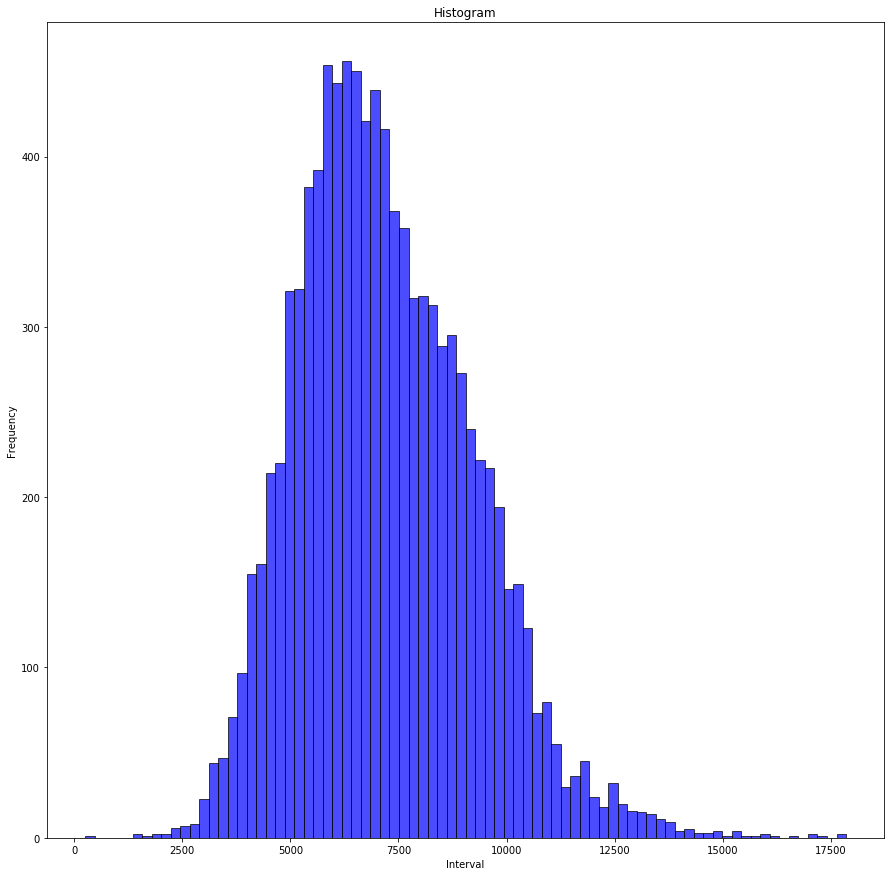

In [22]:
plt.hist(day_list, bins=80, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("Interval")
# 显示纵轴标签
plt.ylabel("Frequency")
# 显示图标题
plt.title("Histogram")
plt.show()

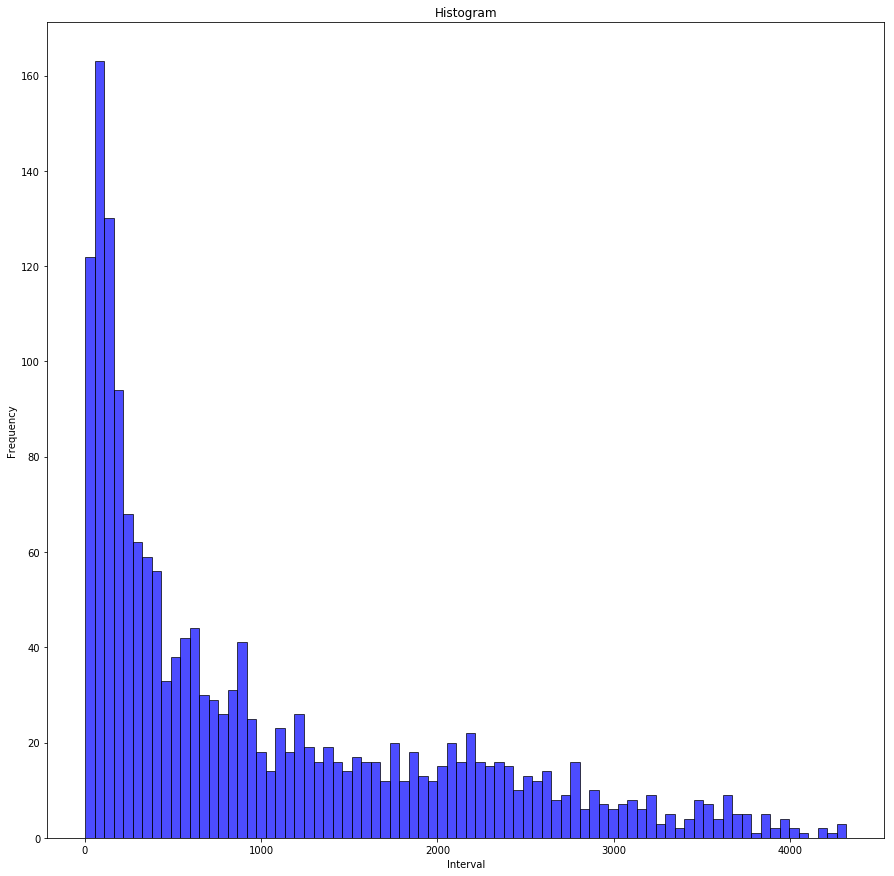

In [23]:
plt.hist(night_list, bins=80, normed=0, facecolor="blue", edgecolor="black", alpha=0.7)
# 显示横轴标签
plt.xlabel("Interval")
# 显示纵轴标签
plt.ylabel("Frequency")
# 显示图标题
plt.title("Histogram")
plt.show()



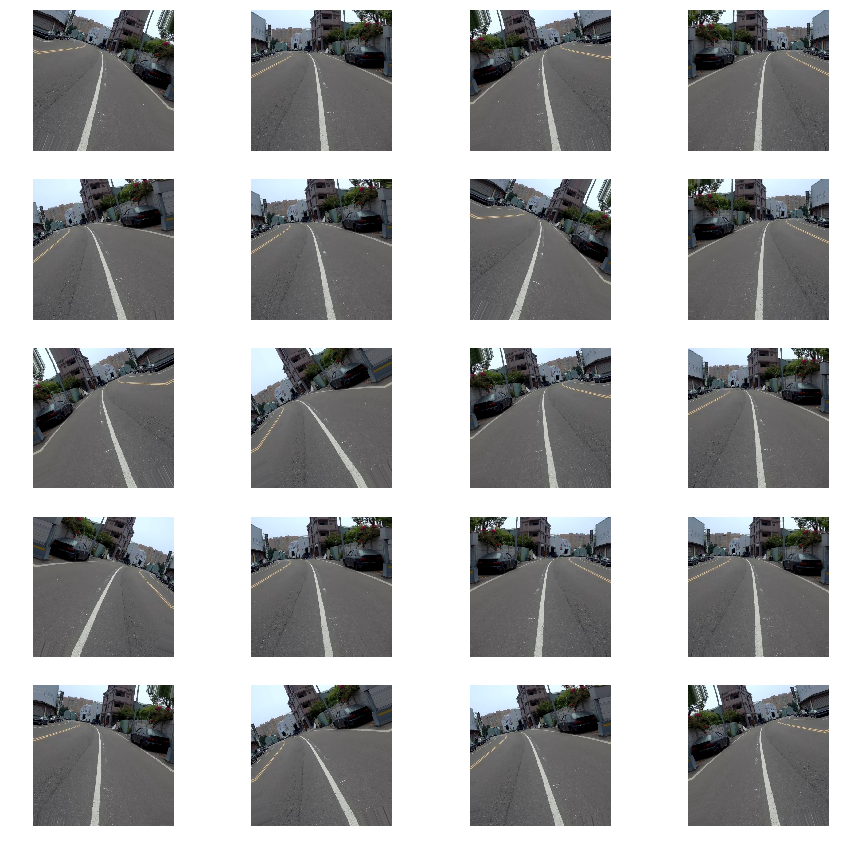

In [28]:
datagen = ImageDataGenerator(zca_whitening=False,
                             rotation_range=30,
                             shear_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

i = 0

for batch in datagen.flow(image, batch_size=10,

    save_to_dir='small-2000', save_prefix='D00-', save_format='jpeg'):

    plt.subplot(5,4,1 + i)

    plt.axis("off")

   

    augImage = batch[0]

    augImage = augImage.astype('float32')

    augImage /= 255

    plt.imshow(augImage)

   

    i += 1

    if i > 19:

        break